<a href="https://colab.research.google.com/github/Cams75018/Velib_predictions/blob/master/LTSM_export_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import load_model
model1=load_model("modelLSTM.h5")

In [0]:
heure = input("entrer l'heure de départ (format HHhMM)")
heure

In [59]:
heur=int(heure.split("h")[0])
minu=int(heure.split("h")[1])
heur, minu

(13, 30)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import datetime

In [0]:
import timeit
start_time = timeit.default_timer()

In [0]:
heurefin=9   # heure de test de la journée et donc cut du dataset au dernier jour à cette heure
minute=15
#heuredebut=datetime.datetime(2020,1,28,15,30,0)
heuredebut=datetime.datetime(2020,1,28,heur,minu,0)
nsteps_in, nsteps_out = 30, 30
nsteps_in2=60
nsteps_in3=90
epok =5

In [63]:

df=pd.read_csv("https://raw.githubusercontent.com/alexisgcomte/velib-prediction/master/3.%20Modeling%20Research/datasets/madeleine_weekday.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (14800, 5)


,Unnamed: 0,availiable_docks,date,weekday,hour
0,0,8,2020-01-15 10:17:00,Wednesday,10
1,1,8,2020-01-15 10:18:00,Wednesday,10
2,2,7,2020-01-15 10:19:00,Wednesday,10
3,3,8,2020-01-15 10:20:00,Wednesday,10
4,4,8,2020-01-15 10:21:00,Wednesday,10


In [0]:
df['datedate'] = pd.to_datetime(df['date'])

In [65]:
# on repère l'index de la dernière minutes à prédire
lastindex=df[df.datedate==heuredebut].index.max()
dfx=df.iloc[0:lastindex+1,:]
dfx.tail()

,Unnamed: 0,availiable_docks,date,weekday,hour,datedate
12746,12746,0,2020-01-28 13:26:00,Tuesday,13,2020-01-28 13:26:00
12747,12747,0,2020-01-28 13:27:00,Tuesday,13,2020-01-28 13:27:00
12748,12748,0,2020-01-28 13:28:00,Tuesday,13,2020-01-28 13:28:00
12749,12749,0,2020-01-28 13:29:00,Tuesday,13,2020-01-28 13:29:00
12750,12750,0,2020-01-28 13:30:00,Tuesday,13,2020-01-28 13:30:00


In [0]:
#dfx=df[(df.hour==heurefin-1) | (df.hour== heurefin)]
#lastindex=dfx.index.max()
for i in range(lastindex,lastindex +1+ nsteps_out,1):
  dfx.loc[i]=df.iloc[i,:]
dfx.reset_index(inplace=True)


In [67]:
df2=dfx.loc[:dfx.index.max(),['date','availiable_docks']]
#df3.sort_values('datenew', inplace=True, ascending=True)
#df3 = df3.reset_index(drop=True)
print('Number of rows and columns:',dfx.shape)
print(df2.date.min())
print(df2.date.max())
df2.columns=["datenew","TOTALFD"]


Number of rows and columns: (12781, 7)
2020-01-15 10:17:00
2020-01-28 14:00:00


In [68]:
df3=df2.loc[:len(df2)-1-nsteps_out,["datenew","TOTALFD"]]
df3.tail()

,datenew,TOTALFD
12746,2020-01-28 13:26:00,0
12747,2020-01-28 13:27:00,0
12748,2020-01-28 13:28:00,0
12749,2020-01-28 13:29:00,0
12750,2020-01-28 13:30:00,0


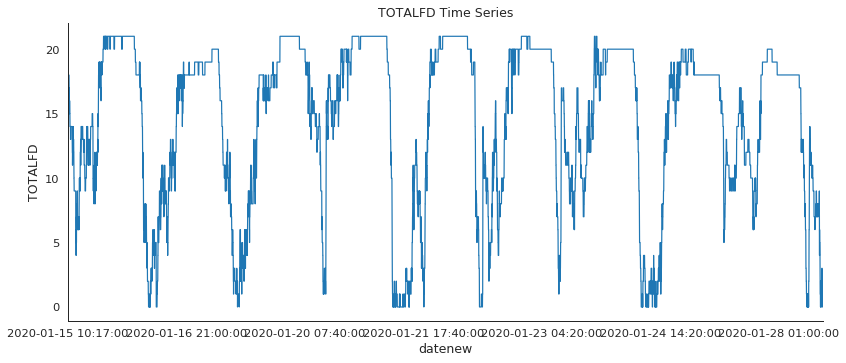

In [69]:
df4=df3.loc[:,['datenew','TOTALFD']]
df5=df3.loc[:,['datenew','TOTALFD']]
df4.set_index('datenew',inplace=True)
df4.plot(figsize=(12,5))
plt.ylabel('TOTALFD')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('TOTALFD Time Series')
sns.despine(top=True)
plt.show();

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
from numpy import array
scaler = MinMaxScaler(feature_range=(-1, 1))
raw_seq = df3.TOTALFD.to_numpy()
#normalisation
raw_seq_scaled = scaler.fit_transform(raw_seq.reshape(-1,1))

In [72]:

heurefin=9   # heure de test de la journée et donc cut du dataset au dernier jour à cette heure
minute=15
heuredebutt=heuredebut #datetime.datetime(2020,1,29,8,30,0)
nsteps_in, nsteps_out = 30, 30
nsteps_in2= 60
nsteps_in3= 90
epok =2

n_steps_in=nsteps_in2
n_steps_out= nsteps_out

lastindexx=df[df.datedate==heuredebutt].index.max()
dfxx=df.iloc[0:lastindexx+1,:]
dfxx.tail()

for i in range(lastindexx,lastindexx +1+ nsteps_out,1):
  dfxx.loc[i]=df.iloc[i,:]
dfxx.reset_index(inplace=True)

df22=dfxx.loc[:dfxx.index.max(),['date','availiable_docks']]
#df3.sort_values('datenew', inplace=True, ascending=True)
#df3 = df3.reset_index(drop=True)
print('Number of rows and columns:',dfxx.shape)
print(df22.date.min())
print(df22.date.max())
df22.columns=["datenew","TOTALFD"]

df33=df22.loc[:len(df22)-1-nsteps_out,["datenew","TOTALFD"]]
df33.tail()

#scaler = MinMaxScaler(feature_range=(-1, 1))
n_features=1

raw_seq = df33.TOTALFD.to_numpy()
X_input_scal=scaler.transform(array(raw_seq[-n_steps_in:]).reshape(-1,1))
X_input_scal.reshape(X_input_scal.shape[0],)
X_input_scal = X_input_scal.reshape((1, n_steps_in, n_features))
#x_input = x_input.reshape((1, n_steps_in, n_features))
yhatt = model1.predict(X_input_scal, verbose=0)
yhatt=scaler.inverse_transform(yhatt.reshape(yhatt.shape[0],yhatt.shape[1]))


dfress=df22.tail(n_steps_out*3)
dfress["pred"]=0.0
dfress = dfress.reset_index()
#lastindex=dfres.tail(1).index.start
yhat22=pd.DataFrame(yhatt.reshape(n_steps_out,1))
for ind in range(len(dfress)-1, -len(yhat22) + len(dfress)-1 , -1):
   dfress["pred"][ind]=yhat22.iloc[ind-len(dfress)]

from math import sqrt
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
msedff=dfress.tail(n_steps_out)
heurefin=heuredebutt+datetime.timedelta(minutes=nsteps_out)
print("RMSE 3 ",measure_rmse(msedff.TOTALFD,msedff.pred))
print("RMSE 3 prédictions arrondies ", measure_rmse(msedff.TOTALFD,round(msedff.pred)))
print("nb epoch", epok)
print("nb stepIN", n_steps_in)
print("nb stepOUT", nsteps_out)
print("prédiction de ",heuredebutt.hour,"h",heuredebutt.minute," à " ,heurefin.hour,"h",heurefin.minute,"min")
#print("temps d'execution " , int(elapsed3/60), "min", int((round(elapsed3/60,2,)-(int(elapsed3/60)))*60), "s")

dfress.tail(n_steps_out)

Number of rows and columns: (12781, 7)
2020-01-15 10:17:00
2020-01-28 14:00:00
RMSE 3  0.5572353616097574
RMSE 3 prédictions arrondies  0.5773502691896257
nb epoch 2
nb stepIN 60
nb stepOUT 30
prédiction de  13 h 30  à  14 h 0 min


,index,datenew,TOTALFD,pred
60,12751,2020-01-28 13:31:00,0,-0.3005
61,12752,2020-01-28 13:32:00,0,0.0615
62,12753,2020-01-28 13:33:00,0,-0.1353
63,12754,2020-01-28 13:34:00,0,-0.1320
64,12755,2020-01-28 13:35:00,0,-0.0959
65,12756,2020-01-28 13:36:00,0,-0.0004
66,12757,2020-01-28 13:37:00,0,0.1222
67,12758,2020-01-28 13:38:00,0,0.2628
68,12759,2020-01-28 13:39:00,0,0.4058
69,12760,2020-01-28 13:40:00,0,0.5423


In [73]:
prediction= int(round(dfress.pred[len(dfress)-1]))
print(prediction)
if heurefin.minute== 0:
  minutefin = "00"
else:
  minutefin= str(heurefin.minute)
heureprediction =str(heurefin.hour) + "h" + minutefin
#print(heureprediction)

1
14h00


In [77]:
prediction

1

In [76]:
print("Nous prevoyons ",prediction," dock(s) Velib disponibles à la Station Madeleine à ",heureprediction )

Nous prevoyons  1  dock(s) Velib disponibles à la Station Madeleine à  14h00
